In [210]:
try:
  from sklearnex import patch_sklearn # speed up sklearn if cpu is intel
  patch_sklearn()
except ImportError as sklearnex_not_installed:
  print("sklearnex not installed, use default sklearn instead")
  print("if you want to use sklearn, please refer to https://pypi.org/project/scikit-learn-intelex/")
  

from TrainingData import load_KTH
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm, preprocessing
from sklearn.pipeline import make_pipeline
import pandas as pd

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [211]:
training_data = load_KTH()
training_data["label"] = training_data["label"].apply(lambda x: "running" if x=="jogging" else x)
training_data.groupby("label").count()


,filename,NOSE_x,NOSE_y,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_OUTER_x,LEFT_EYE_OUTER_y,RIGHT_EYE_INNER_x,...,RIGHT_ANKLE_x,RIGHT_ANKLE_y,LEFT_HEEL_x,LEFT_HEEL_y,RIGHT_HEEL_x,RIGHT_HEEL_y,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y
label,,,,,,,,,,,,,,,,,,,,,
running,27649,27649,27649,27649,27649,27649,27649,27649,27649,27649,...,27649,27649,27649,27649,27649,27649,27649,27649,27649,27649
walking,27762,27762,27762,27762,27762,27762,27762,27762,27762,27762,...,27762,27762,27762,27762,27762,27762,27762,27762,27762,27762


<img src="images/Pose Landmark Model.png"><img>

from https://github.com/google/mediapipe/blob/master/docs/solutions/pose.md

In [212]:
unneeded_data = ["filename", "label",'NOSE_x', 'NOSE_y', 'LEFT_EYE_INNER_x', 'LEFT_EYE_INNER_y',
       'LEFT_EYE_x', 'LEFT_EYE_y', 'LEFT_EYE_OUTER_x', 'LEFT_EYE_OUTER_y',
       'RIGHT_EYE_INNER_x', 'RIGHT_EYE_INNER_y', 'RIGHT_EYE_x', 'RIGHT_EYE_y',
       'RIGHT_EYE_OUTER_x', 'RIGHT_EYE_OUTER_y', 'LEFT_EAR_x', 'LEFT_EAR_y',
       'RIGHT_EAR_x', 'RIGHT_EAR_y', 'MOUTH_LEFT_x', 'MOUTH_LEFT_y',
       'MOUTH_RIGHT_x', 'MOUTH_RIGHT_y','LEFT_PINKY_x', 'LEFT_PINKY_y',
       'RIGHT_PINKY_x', 'RIGHT_PINKY_y', 'LEFT_INDEX_x', 'LEFT_INDEX_y',
       'RIGHT_INDEX_x', 'RIGHT_INDEX_y', 'LEFT_THUMB_x', 'LEFT_THUMB_y',
       'RIGHT_THUMB_x', 'RIGHT_THUMB_y','LEFT_HEEL_x', 'LEFT_HEEL_y',
       'RIGHT_HEEL_x', 'RIGHT_HEEL_y', 'LEFT_FOOT_INDEX_x',
       'LEFT_FOOT_INDEX_y', 'RIGHT_FOOT_INDEX_x', 'RIGHT_FOOT_INDEX_y',]

In [213]:
le = preprocessing.LabelEncoder()
training_data["Encoded_label"] = le.fit_transform(training_data["label"])
training_data.drop(unneeded_data, axis=1, inplace=True)
training_data.head()

,LEFT_SHOULDER_x,LEFT_SHOULDER_y,RIGHT_SHOULDER_x,RIGHT_SHOULDER_y,LEFT_ELBOW_x,LEFT_ELBOW_y,RIGHT_ELBOW_x,RIGHT_ELBOW_y,LEFT_WRIST_x,LEFT_WRIST_y,...,RIGHT_HIP_y,LEFT_KNEE_x,LEFT_KNEE_y,RIGHT_KNEE_x,RIGHT_KNEE_y,LEFT_ANKLE_x,LEFT_ANKLE_y,RIGHT_ANKLE_x,RIGHT_ANKLE_y,Encoded_label
0,0.661767,0.849883,0.596500,0.858983,0.853274,0.687178,0.602127,0.710731,0.423706,0.671967,...,0.504340,0.682258,0.324143,0.401035,0.300068,0.926108,0.176288,0.318781,0.048532,0
1,0.485875,0.849842,0.444929,0.860103,0.649157,0.672558,0.531414,0.688963,0.266280,0.680365,...,0.501957,0.188259,0.280406,0.428189,0.282820,0.307078,0.047746,0.895301,0.116373,0
2,0.437808,0.856407,0.298377,0.863216,0.541440,0.665984,0.302727,0.685577,0.119054,0.688653,...,0.510568,0.070149,0.279658,0.336988,0.283900,0.328662,0.043458,0.900703,0.124583,0
3,0.432968,0.852602,0.350171,0.858269,0.382385,0.670727,0.332168,0.685734,0.108216,0.691918,...,0.505469,0.212389,0.263870,0.341090,0.278414,0.503191,0.040660,0.902734,0.123357,0
4,0.520244,0.853186,0.472136,0.858842,0.482407,0.669985,0.470479,0.688985,0.112292,0.702485,...,0.505794,0.328978,0.260767,0.316714,0.280446,0.801016,0.047109,0.849891,0.120582,0


In [214]:
le.classes_

array(['running', 'walking'], dtype=object)

In [215]:
le.transform(le.classes_)

array([0, 1])

In [216]:
X, y = training_data.iloc[:, :-1],  training_data["Encoded_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [217]:
print(X_train.shape)
X_train.head(1)

(41558, 24)


,LEFT_SHOULDER_x,LEFT_SHOULDER_y,RIGHT_SHOULDER_x,RIGHT_SHOULDER_y,LEFT_ELBOW_x,LEFT_ELBOW_y,RIGHT_ELBOW_x,RIGHT_ELBOW_y,LEFT_WRIST_x,LEFT_WRIST_y,...,RIGHT_HIP_x,RIGHT_HIP_y,LEFT_KNEE_x,LEFT_KNEE_y,RIGHT_KNEE_x,RIGHT_KNEE_y,LEFT_ANKLE_x,LEFT_ANKLE_y,RIGHT_ANKLE_x,RIGHT_ANKLE_y
34386,0.670246,0.851905,0.136824,0.836863,0.8063,0.704529,0.063919,0.662318,0.935097,0.599318,...,0.333688,0.525724,0.568148,0.29501,0.50057,0.301714,0.490722,0.093987,0.369958,0.102849


In [218]:
y_train

34386    1
46366    0
2950     0
53074    0
48501    0
        ..
13671    0
16855    1
8631     0
49787    0
37667    1
Name: Encoded_label, Length: 41558, dtype: int32

In [219]:
clf = svm.SVC()

In [220]:
clf.fit(X_train.values, y_train.values)

SVC()

In [221]:
clf.score(X_test.values, y_test.values)

0.9401573666353858

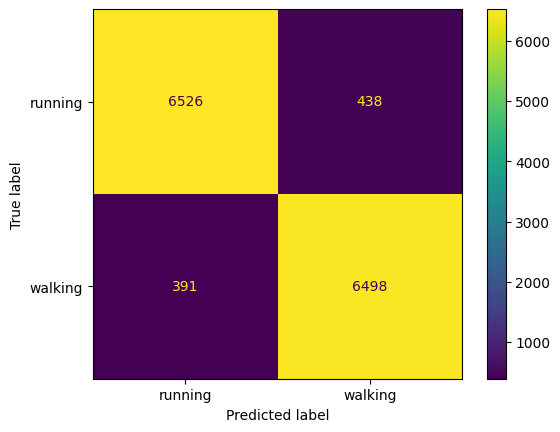

In [223]:
# code from https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test.values)
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred), labels=le.inverse_transform(clf.classes_))
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(clf.classes_))
disp.plot()
plt.show()

# Saving the trained model

In [227]:
import joblib
from pathlib import Path
joblib.dump(clf, str(Path('models')/'action'/'pose_action_classifier.pkl'))
joblib.dump(le, str(Path('models')/'label'/'label_encoder.pkl'))

['models\\label\\label_encoder.pkl']

# loading the saved model
```python
# Load the model from the file
pose_action_classifier = joblib.load('filename.pkl')
label_encoder = joblib.load('filename2.pkl')

# Use the loaded model to make predictions
y_pred = pose_action_classifier.predict(X_test)
action_pred = label_encoder.inverse_transform(y_pred)

```